In [126]:
import numpy as np
import networkx as nx
from igraph import *
from tkinter import *
from functools import partial

In [136]:
edges, G = [], nx.Graph()

In [148]:
def first_screen():
    graph_main_info = Tk() 
    graph_main_info.geometry("500x300+300+200") #dimensoes da janela --> Largura x Altura + DistanciaDaMargemEsquerda + DistanciaDaMargemSuperior
    graph_main_info.title("Tópicos Especiais em Engenharia de Computação 2") #título da janela
    
    lb_secondary_title = Label (graph_main_info, text="Simulação", fg= "orange", bg="white", font=["Verdana", 16]).pack(pady=50) #criando rótulo
    lb_node = Label(graph_main_info, text="Número de nós:", bg="white").place(x=110, y=130)
    lb_edge = Label(graph_main_info, text="Número de enlaces:", bg="white").place(x=110, y=180)
    
    node_qnt_input = Entry(graph_main_info, width=30, bg="white")
    node_qnt_input.place(x=110, y=150)
    
    edge_qnt_input = Entry(graph_main_info, width=30, bg="white")
    edge_qnt_input.place(x=110, y=200)
    
    bt_confirm = Button(graph_main_info, width=10, bg="white", text="Confirmar", command=partial(second_screen_transition, graph_main_info, node_qnt_input, edge_qnt_input)).place(x=275, y=230)
    graph_main_info.mainloop()

def second_screen_transition(previous_screen, node_qnt, edge_qnt):
    second_screen(previous_screen, int(node_qnt.get()), int(edge_qnt.get()))
    
def second_screen(previous_screen, node_qnt, edge_qnt):
    graph_specs = Tk() #criacao de uma janela - instancia de Tk
    graph_specs.geometry("500x300+300+200") #dimensoes da janela --> Largura x Altura + DistanciaDaMargemEsquerda + DistanciaDaMargemSuperior
    graph_specs.title("Tópicos Especiais em Engenharia de Computação 2") #título da janela
    
    lb_secondary_title = Label (graph_specs, text="Simulação Parte 2", fg= "orange", bg="white", font=["Verdana", 16]).pack(pady=50) #criando rótulo
    
    dist_vector = []
    lb_A_vector = []
    lb_B_vector = []

    for i in range(1, int(edge_qnt) + 1):
        dist_input = Entry(graph_specs, width=30, bg="white")
        dist_input.place(x=110, y=20*i + 150)
        dist_vector.append(dist_input)
        
        lb_A_input = Entry(graph_specs, width=30, bg="white")
        lb_A_input.place(x=310, y=20*i + 150)
        lb_A_vector.append(lb_A_input)
        
        lb_B_input = Entry(graph_specs, width=30, bg="white")
        lb_B_input.place(x=510, y=20*i + 150)
        lb_B_vector.append(lb_B_input)
        
    bt_confirm = Button (graph_specs, width=20, text="Cadastrar", command = partial(process_graph_info, graph_specs, node_qnt, edge_qnt, dist_vector, lb_A_vector, lb_B_vector), bg="white").pack() #criando botao "cadastrar"
    previous_screen.destroy()
    
def process_graph_info(previous_screen, node_qnt, edge_qnt, dist_vector, lb_A_vector, lb_B_vector):
    processed_dists = []
        
    for d in dist_vector:
        processed_dists.append(int(d.get()))
        
    newtwork = Graph(node_qnt)
    newtwork.es['weight'] = processed_dists
    
    ascii_default_value = ord('a')
    for i in range(edge_qnt):
        u = ord(lb_A_vector[i].get()) - ascii_default_value
        v = ord(lb_B_vector[i].get()) - ascii_default_value
        w = processed_dists[i]
        
        newtwork.add_edge(u, v)
        edges.append((u, v, w))
    
    create_graph(node_qnt, G)
    previous_screen.destroy()
    
def create_graph(node_qnt, G):    
    for e in edges:
        G.add_edge(e[0], e[1], weight = e[2])

def print_path(G, u, v):
    print(nx.shortest_path(G, u, v))

def minimum_cost(path, G):
    ans = 0
    
    for i in range(len(path)-1):
        u, v = path[i], path[i+1]
        
        ans += G.adj[u][v]['weight']
    
    return ans

def print_graph(G):
    pos=nx.spring_layout(G)
    nx.draw(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [ ]:
if __name__ == "__main__":
    first_screen()

Minimum Path Cost 15


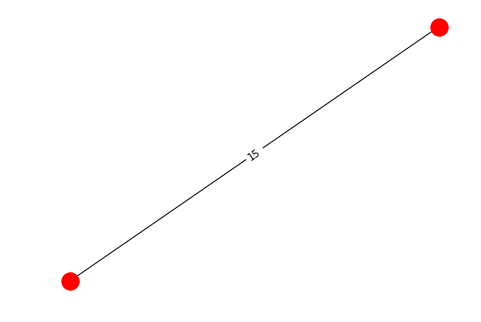

In [151]:
print_graph(G)
print("Minimum Path Cost", minimum_cost(nx.shortest_path(G, 0, 1), G))

In [120]:
for u, adj_u in zip(G.adj.keys(), G.adj.values()):
    for v in adj_u:
        print(G.adj[u][v]['weight'])

0.6
0.2
0.3
0.6
0.2
0.1
0.7
0.9
0.1
0.3
0.7
0.9
